# Continuous Assemblies: Linear Assemblies

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

In this notebook we will talk about continuous assemblies. In this notebook we will board the assemblies of two or more Linear Regressions of a continuous way.

### We import all the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Creation of all the points to train and test the model

We set the seed

In [2]:
np.random.seed(10)

Creation of the points

In [3]:
# Breakpoints

v_1 = -2
v_2 = 3

#---------------------------------------------------

# Parameters of the model

a = -10
b = 12

h = 0.5

#---------------------------------------------------

N = int((b - a)/h) + 1

#---------------------------------------------------

# Value of the function evaluate at x = a

f_a = 12

#---------------------------------------------------

# Slope of the differents sections

m_1 = -3
m_2 = -1
m_3 = 5

#---------------------------------------------------

# Seting the first values of the domain and range

f_x = f_a
x = a - h

#---------------------------------------------------

# Amplification of the noise

c = 2

#---------------------------------------------------

X = []
y = []

#---------------------------------------------------

for i in range(N):

    x = round(x + h, 1)

    noise = np.random.uniform(-h*c, h*c)

    if x <= v_1:

        f_x = f_x + m_1*h + noise

        X.append(x)
        y.append(f_x)

    elif (x > v_1) and (x <= v_2):

        f_x = f_x + m_2*h + noise

        X.append(x)
        y.append(f_x)

    else:

        f_x = f_x + m_3*h + noise

        X.append(x)
        y.append(f_x)

#---------------------------------------------------

Creation of dataframe

In [4]:
df = pd.DataFrame()

In [5]:
df['X'] = pd.Series(X).astype(float)
df['y'] = pd.Series(y).astype(float)

In [6]:
df

,X,y
0,-10.0,11.042641
1,-9.5,8.584145
2,-9.0,7.351442
3,-8.5,6.349049
4,-8.0,4.846063
5,-7.5,2.795657
6,-7.0,0.691782
7,-6.5,-0.287156
8,-6.0,-2.448934
9,-5.5,-4.772255


Graph of these points

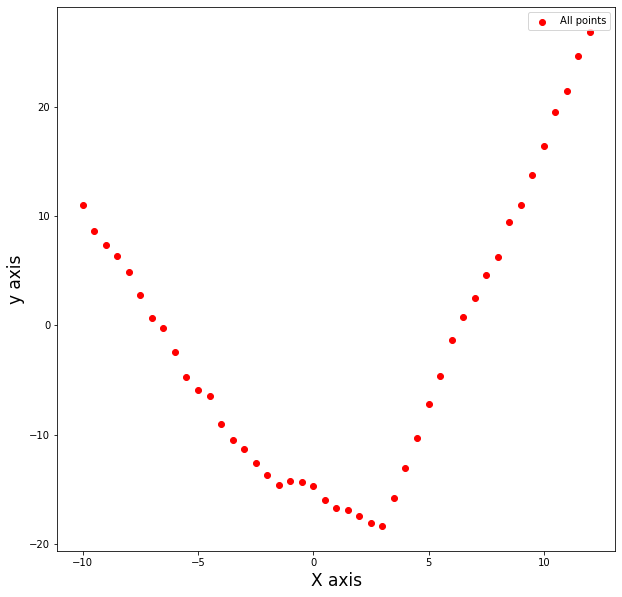

In [7]:
figure(figsize=(10,10))
plt.scatter(df['X'], df['y'], color = 'red', label = 'All points')

plt.xlabel('X axis', size = 17)
plt.ylabel('y axis', size = 17)

plt.legend()
plt.show()

Separating the train set and the test set

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [9]:
train = pd.DataFrame()
test = pd.DataFrame()

In [10]:
train['X'] = pd.Series(X_train).astype(float)
train['y'] = pd.Series(y_train).astype(float)

In [11]:
test['X'] = pd.Series(X_test).astype(float)
test['y'] = pd.Series(y_test).astype(float)

Graph of train and test set

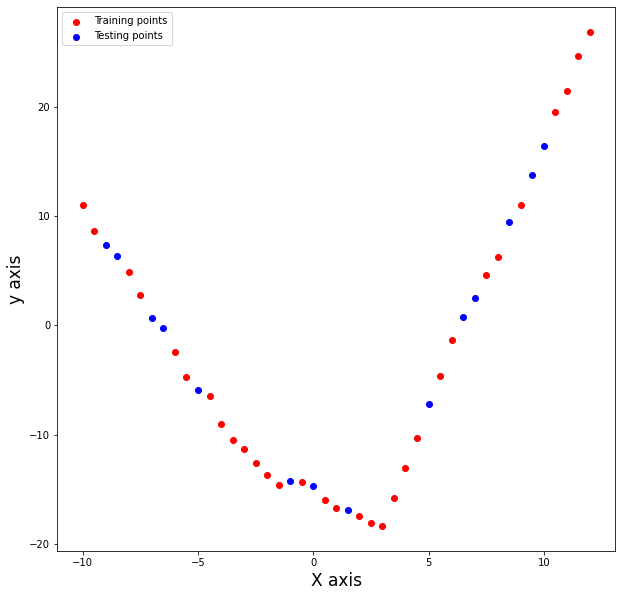

In [12]:
figure(figsize=(10,10))
plt.scatter(train['X'], train['y'], color = 'red', label = 'Training points')
plt.scatter(test['X'], test['y'], color = 'blue', label = 'Testing points')

plt.xlabel('X axis', size = 17)
plt.ylabel('y axis', size = 17)

plt.legend()
plt.show()

### Mathematical Development

First of all, we must to say exists two ways of to do this aasemble. The first "Left to the right" and the second "Right to the left".

### $ \underline{1. \ Left \ \ to \ \ the \ \ right:} $

We will consider three functions: 

$ f_1(x) = \alpha_1^{left} \cdot x + \alpha_0^{left} \ \ \  $ for $ \ \ \ a \leq x \leq v_1 $

$ f_2(x) = \beta_1^{left} \cdot x + \beta_0^{left} \ \ \  $ for $ \ \ \ v_1 \leq x \leq v_2 $

$ f_3(x) = \gamma_1^{left} \cdot x + \gamma_0^{left} \ \ \  $ for $ \ \ \ v_2 \leq x \leq b $

*$\underline{Step \ 1:}$* We estimate the values of $ \alpha_1^{left} $ and $ \alpha_0^{left}$. From now on, we will write the known values with green color and the unkown values with red color. 

*$\underline{Step \ 2:}$* For the union of the first and second function to be continued we need the following equation is fulfilled:

$ f_1(v_1) = f_2(v_1) $

$ \Rightarrow $

$ \textcolor{green}{\alpha_1^{left}} \cdot \textcolor{green}{v_1} + \textcolor{green}{\alpha_0^{left}} = \textcolor{red}{\beta_1^{left}} \cdot \textcolor{green}{v_1} + \textcolor{red}{\beta_0^{left}} $

$ \Rightarrow $

$ \boxed{\textcolor{red}{\beta_0^{left}} = \textcolor{green}{\alpha_1^{left}} \cdot \textcolor{green}{v_1} + \textcolor{green}{\alpha_0^{left}} -  \textcolor{red}{\beta_1^{left}} \cdot \textcolor{green}{v_1}} \ \ \ (1)  $

Substituting this result in $ f_2(x)$ we obtain:

$ f_2(x) = \textcolor{red}{\beta_1^{left}} \cdot x + \textcolor{green}{\alpha_1^{left}} \cdot \textcolor{green}{v_1} + \textcolor{green}{\alpha_0^{left}} -  \textcolor{red}{\beta_1^{left}} \cdot \textcolor{green}{v_1} $ 

$ \Rightarrow $

$ f_2(x) - (\textcolor{green}{\alpha_1^{left}} \cdot \textcolor{green}{v_1} + \textcolor{green}{\alpha_0^{left}}) = \textcolor{red}{\beta_1^{left}} \cdot (x-\textcolor{green}{v_1}) $ 

We create the next new variables:

$ u_2 = f_2(x) - (\textcolor{green}{\alpha_1^{left}} \cdot \textcolor{green}{v_1} + \textcolor{green}{\alpha_0^{left}}) $

$ W_2 = x - \textcolor{green}{v_1} $

Thus we have the next linear regressión without intercept:

$ u_2 = \textcolor{red}{\beta_1^{left}} \cdot W_2 $

Once we have the value $ \textcolor{red}{\beta_1^{left}} $ we replaced this value in $(1)$ to obtain the value of $ \textcolor{red}{\beta_0^{left}} $.

*$\underline{Step \ 3:}$* For the union of the second and third function to be continued we need the following equation is fulfilled:

$ f_2(v_2) = f_3(v_2) $

$ \Rightarrow $

$ \textcolor{green}{\beta_1^{left}} \cdot \textcolor{green}{v_2} + \textcolor{green}{\beta_0^{left}} = \textcolor{red}{\gamma_1^{left}} \cdot \textcolor{green}{v_2} + \textcolor{red}{\gamma_0^{left}} $

$ \Rightarrow $

$ \boxed{\textcolor{red}{\gamma_0^{left}} = \textcolor{green}{\beta_1^{left}} \cdot \textcolor{green}{v_2} + \textcolor{green}{\beta_0^{left}} -  \textcolor{red}{\gamma_1^{left}} \cdot \textcolor{green}{v_2}} \ \ \ (2)  $

Substituting this result in $ f_3(x)$ we obtain:


$ f_3(x) = \textcolor{red}{\gamma_1^{left}} \cdot x + \textcolor{green}{\beta_1^{left}} \cdot \textcolor{green}{v_2} + \textcolor{green}{\beta_0^{left}} -  \textcolor{red}{\gamma_1^{left}} \cdot \textcolor{green}{v_2} $ 

$ \Rightarrow $

$ f_2(x) - (\textcolor{green}{\beta_1^{left}} \cdot \textcolor{green}{v_2} + \textcolor{green}{\beta_0^{left}}) = \textcolor{red}{\gamma_1^{left}} \cdot (x-\textcolor{green}{v_2}) $ 

We create the next new variables:

$ u_3 = f_3(x) - (\textcolor{green}{\beta_1^{left}} \cdot \textcolor{green}{v_2} + \textcolor{green}{\beta_0^{left}}) $

$ W_3 = x - \textcolor{green}{v_2} $

Thus we have the next linear regressión without intercept:

$ u_3 = \textcolor{red}{\gamma_1^{left}} \cdot W_3 $

Once we have the value $ \textcolor{red}{\gamma_1^{left}} $ we replaced this value in $(2)$ to obtain the value of $ \textcolor{red}{\gamma_0^{left}} $.

### $ \underline{2. \ Right \ \ to \ \ the \ \ left:} $

We will consider three functions: 

$ f_1(x) = \alpha_1^{right} \cdot x + \alpha_0^{right} \ \ \  $ for $ \ \ \ a \leq x \leq v_1 $

$ f_2(x) = \beta_1^{right} \cdot x + \beta_0^{right} \ \ \  $ for $ \ \ \ v_1 \leq x \leq v_2 $

$ f_3(x) = \gamma_1^{right} \cdot x + \gamma_0^{right} \ \ \  $ for $ \ \ \ v_2 \leq x \leq b $

*$\underline{Step \ 1:}$* We estimate the values of $ \gamma_1^{right} $ and $ \gamma_0^{right}$. From now on, we will write the known values with green color and the unkown values with red color. 

*$\underline{Step \ 2:}$* For the union of the second and third function to be continued we need the following equation is fulfilled:

$ f_3(v_2) = f_2(v_2) $

$ \Rightarrow $

$ \textcolor{green}{\gamma_1^{right}} \cdot \textcolor{green}{v_2} + \textcolor{green}{\gamma_0^{right}} = \textcolor{red}{\beta_1^{right}} \cdot \textcolor{green}{v_2} + \textcolor{red}{\beta_0^{right}} $

$ \Rightarrow $

$ \boxed{\textcolor{red}{\beta_0^{right}} = \textcolor{green}{\gamma_1^{right}} \cdot \textcolor{green}{v_2} + \textcolor{green}{\gamma_0^{right}} -  \textcolor{red}{\beta_1^{right}} \cdot \textcolor{green}{v_2}} \ \ \ (3)  $

Substituting this result in $ f_2(x)$ we obtain:

$ f_2(x) = \textcolor{red}{\beta_1^{right}} \cdot x + \textcolor{green}{\gamma_1^{right}} \cdot \textcolor{green}{v_2} + \textcolor{green}{\gamma_0^{right}} -  \textcolor{red}{\beta_1^{right}} \cdot \textcolor{green}{v_2} $ 

$ \Rightarrow $

$ f_2(x) - (\textcolor{green}{\gamma_1^{right}} \cdot \textcolor{green}{v_2} + \textcolor{green}{\gamma_0^{right}}) = \textcolor{red}{\beta_1^{right}} \cdot (x-\textcolor{green}{v_2}) $ 

We create the next new variables:

$ u_2 = f_2(x) - (\textcolor{green}{\gamma_1^{right}} \cdot \textcolor{green}{v_2} + \textcolor{green}{\gamma_0^{right}}) $

$ W_2 = x - \textcolor{green}{v_2} $

Thus we have the next linear regressión without intercept:

$ u_2 = \textcolor{red}{\beta_1^{right}} \cdot W_2 $

Once we have the value $ \textcolor{red}{\beta_1^{right}} $ we replaced this value in $(3)$ to obtain the value of $ \textcolor{red}{\beta_0^{right}} $.

*$\underline{Step \ 3:}$* For the union of the first and second function to be continued we need the following equation is fulfilled:

$ f_2(v_1) = f_1(v_1) $

$ \Rightarrow $

$ \textcolor{green}{\beta_1^{right}} \cdot \textcolor{green}{v_1} + \textcolor{green}{\beta_0^{right}} = \textcolor{red}{\alpha_1^{right}} \cdot \textcolor{green}{v_1} + \textcolor{red}{\alpha_0^{right}} $

$ \Rightarrow $

$ \boxed{\textcolor{red}{\alpha_0^{right}} = \textcolor{green}{\beta_1^{right}} \cdot \textcolor{green}{v_1} + \textcolor{green}{\beta_0^{right}} -  \textcolor{red}{\alpha_1^{right}} \cdot \textcolor{green}{v_1}} \ \ \ (4)  $

Substituting this result in $ f_1(x)$ we obtain:

$ f_1(x) = \textcolor{red}{\alpha_1^{right}} \cdot x + \textcolor{green}{\beta_1^{right}} \cdot \textcolor{green}{v_1} + \textcolor{green}{\beta_0^{right}} -  \textcolor{red}{\alpha_1^{right}} \cdot \textcolor{green}{v_1} $ 

$ \Rightarrow $

$ f_1(x) - (\textcolor{green}{\beta_1^{right}} \cdot \textcolor{green}{v_1} + \textcolor{green}{\beta_0^{right}}) = \textcolor{red}{\alpha_1^{right}} \cdot (x-\textcolor{green}{v_1}) $ 

We create the next new variables:

$ u_1 = f_1(x) - (\textcolor{green}{\beta_1^{right}} \cdot \textcolor{green}{v_1} + \textcolor{green}{\beta_0^{right}}) $

$ W_1 = x - \textcolor{green}{v_1} $

Thus we have the next linear regressión without intercept:

$ u_1 = \textcolor{red}{\alpha_1^{right}} \cdot W_1 $

Once we have the value $ \textcolor{red}{\alpha_1^{right}} $ we replaced this value in $(4)$ to obtain the value of $ \textcolor{red}{\alpha_0^{right}} $.

### Training

In [13]:
f_1 = (train['X'] <= v_1)
f_2 = (train['X'] <= v_2) & (train['X'] > v_1)
f_3 = (train['X'] > v_2)

In [14]:
f_1_test = (test['X'] <= v_1)
f_2_test = (test['X'] <= v_2) & (test['X'] > v_1)
f_3_test = (test['X'] > v_2)

In [15]:
X_1 = train[f_1][['X']].values
y_1 = train[f_1]['y'].values

In [16]:
X_2 = train[f_2][['X']].values
y_2 = train[f_2]['y'].values

In [17]:
X_3 = train[f_3][['X']].values
y_3 = train[f_3]['y'].values

### $ \underline{1. \ Left \ \ to \ \ the \ \ right:} $

**a. First section**

Normalizing variables

In [18]:
X_1_norm = (X_1 - X_1.mean())/X_1.std()
y_1_norm = (y_1 - y_1.mean())/y_1.std()

In [19]:
reg_1_norm_left = LinearRegression().fit(X_1_norm, y_1_norm)

In [20]:
alpha_1_norm_left = reg_1_norm_left.coef_[0]
alpha_0_norm_left = reg_1_norm_left.intercept_

In [21]:
alpha_1_norm_left, alpha_0_norm_left

(-0.9973890629401794, 7.175021571436903e-17)

We have:

$ y_{1, norm} = \alpha_{1, norm}^{left} \cdot X_{1, norm} + \alpha_{0, norm}^{left} $ 

$ \Rightarrow $

$ \left( \cfrac{y_1 - \bar{y_1}}{\sigma({y_1})} \right) = \alpha_{1, norm}^{left} \cdot \left( \cfrac{X_1 - \bar{X_1}}{\sigma({X_1})} \right) + \alpha_{0, norm}^{left} $ 

$ \Rightarrow $

$ y_1 = \textcolor{red}{\left( \cfrac{\sigma(y_1)}{\sigma(X_1)} \cdot \alpha_{1, norm}^{left} \right)} \cdot X_1 + \textcolor{red}{ \left( \bar{y_1} + \sigma(y_1) \cdot \alpha_{0, norm}^{left} -  \cfrac{\sigma(y_1)}{\sigma(X_1)} \cdot \alpha_{1, norm}^{left} \cdot \bar{X_1} \right)}  $ 

$ \Rightarrow $

$ \boxed{\alpha^1_{left} = \textcolor{green}{\left( \cfrac{\sigma(y_1)}{\sigma(X_1)} \cdot \alpha_{1, norm}^{left} \right)}} \ \ \ (5) $ 

$ \boxed{\alpha^0_{left} =  \textcolor{green}{ \left( \bar{y_1} + \sigma(y_1) \cdot \alpha_{0, norm}^{left} -  \cfrac{\sigma(y_1)}{\sigma(X_1)} \cdot \alpha_{1, norm}^{left} \cdot \bar{X_1} \right)}} \ \ \ (6) $ 

In [22]:
alpha_1_left = (y_1.std()/X_1.std())*alpha_1_norm_left

In [23]:
alpha_0_left = y_1.mean() + y_1.std()*alpha_0_norm_left - (y_1.std()/X_1.std())*alpha_1_norm_left*X_1.mean()

In [24]:
alpha_1_left, alpha_0_left

(-3.134114552360378, -20.863864373715447)

Graph

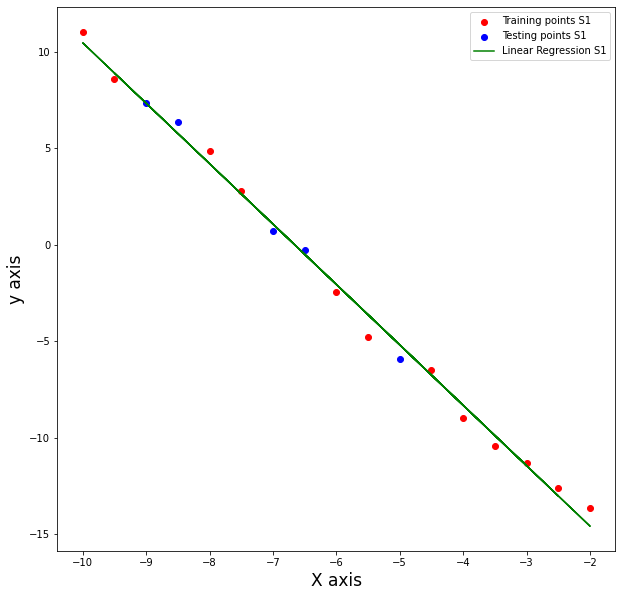

In [25]:
figure(figsize=(10,10))
plt.scatter(train[f_1]['X'], train[f_1]['y'], color = 'red', label = 'Training points S1')
plt.scatter(test[f_1_test]['X'], test[f_1_test]['y'], color = 'blue', label = 'Testing points S1')
plt.plot(train[f_1]['X'], alpha_1_left*train[f_1]['X'] + alpha_0_left, color = 'green', label = 'Linear Regression S1')

plt.xlabel('X axis', size = 17)
plt.ylabel('y axis', size = 17)

plt.legend()
plt.show()

**b. Second section**

In [26]:
u_2_left = train[f_2]['y'] - (alpha_1_left*v_1 + alpha_0_left)
W_2_left = train[f_2][['X']] - v_1

In [27]:
u_2_left_norm = u_2_left/u_2_left.std()
W_2_left_norm = W_2_left/W_2_left.std()

In [28]:
reg_2_norm_left = LinearRegression(fit_intercept=False).fit(W_2_left_norm, u_2_left_norm)

In [29]:
beta_1_norm_left = reg_2_norm_left.coef_[0]

In [30]:
beta_1_norm_left

-0.7069960095439737

We have:

$ u_{2, norm}^{left} = \beta_{1, norm}^{left} \cdot W_{2, norm}^{left} $ 

$ \cfrac{u_{2}^{left}}{\sigma(u_{2}^{left})} = \beta_{1, norm}^{left} \cdot \left( \cfrac{W_{2}^{left}}{\sigma(W_{2}^{left})} \right) $ 

$ \Rightarrow $

$ u_{2}^{left} = \textcolor{red}{\left( \beta_{1, norm}^{left} \cdot  \cfrac{\sigma(u_{2}^{left})}{\sigma(W_{2}^{left})} \right)} \cdot W_{2}^{left} $ 

$ \Rightarrow $

$ \boxed{\beta_1^{left} = \textcolor{green}{\left( \beta_{1, norm}^{left} \cdot  \cfrac{\sigma(u_{2}^{left})}{\sigma(W_{2}^{left})} \right)}} \ \ \ (7) $

In [31]:
beta_1_left = beta_1_norm_left*(u_2_left.std()/W_2_left.std()[0])

In [32]:
beta_1_left

-0.7019494150936038

Remembering

$ \boxed{\textcolor{red}{\beta_0^{left}} = \textcolor{green}{\alpha_1^{left}} \cdot \textcolor{green}{v_1} + \textcolor{green}{\alpha_0^{left}} -  \textcolor{red}{\beta_1^{left}} \cdot \textcolor{green}{v_1}} \ \ \ (1)  $

In [33]:
beta_0_left = alpha_1_left*v_1 + alpha_0_left - beta_1_left*v_1

In [34]:
beta_1_left, beta_0_left

(-0.7019494150936038, -15.999534099181899)

Graph

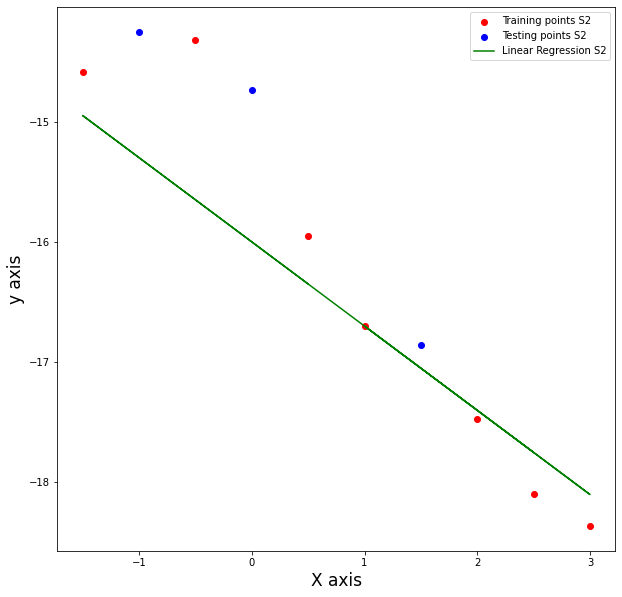

In [35]:
figure(figsize=(10,10))
plt.scatter(train[f_2]['X'], train[f_2]['y'], color = 'red', label = 'Training points S2')
plt.scatter(test[f_2_test]['X'], test[f_2_test]['y'], color = 'blue', label = 'Testing points S2')
plt.plot(train[f_2]['X'], beta_1_left*train[f_2]['X'] + beta_0_left, color = 'green', label = 'Linear Regression S2')

plt.xlabel('X axis', size = 17)
plt.ylabel('y axis', size = 17)

plt.legend()
plt.show()

**c. Third section**

In [36]:
u_3_left = train[f_3]['y'] - (beta_1_left*v_2 + beta_0_left)
W_3_left = train[f_3][['X']] - v_2

In [37]:
u_3_left_norm = u_3_left/u_3_left.std()
W_3_left_norm = W_3_left/W_3_left.std()

In [38]:
reg_3_norm_left = LinearRegression(fit_intercept=False).fit(W_3_left_norm, u_3_left_norm)

In [39]:
gamma_1_norm_left = reg_3_norm_left.coef_[0]

In [40]:
gamma_1_norm_left

1.012364732616534

We have:

$ u_{3, norm}^{left} = \gamma_{1, norm}^{left} \cdot W_{3, norm}^{left} $ 

$ \cfrac{u_{3}^{left}}{\sigma(u_{3}^{left})} = \gamma_{1, norm}^{left} \cdot \left( \cfrac{W_{3}^{left}}{\sigma(W_{3}^{left})} \right) $ 

$ \Rightarrow $

$ u_{3}^{left} = \textcolor{red}{\left( \gamma_{1, norm}^{left} \cdot  \cfrac{\sigma(u_{3}^{left})}{\sigma(W_{3}^{left})} \right)} \cdot W_{3}^{left} $ 

$ \Rightarrow $

$ \boxed{\gamma_1^{left} = \textcolor{green}{\left( \gamma_{1, norm}^{left} \cdot  \cfrac{\sigma(u_{3}^{left})}{\sigma(W_{3}^{left})} \right)}} \ \ \ (8) $

In [41]:
gamma_1_left = gamma_1_norm_left*(u_3_left.std()/W_3_left.std()[0])

In [42]:
gamma_1_left

4.996909148803505

Remembering

$ \boxed{\textcolor{red}{\gamma_0^{left}} = \textcolor{green}{\beta_1^{left}} \cdot \textcolor{green}{v_2} + \textcolor{green}{\beta_0^{left}} -  \textcolor{red}{\gamma_1^{left}} \cdot \textcolor{green}{v_2}} \ \ \ (2)  $

In [43]:
gamma_0_left = beta_1_left*v_2 + beta_0_left - gamma_1_left*v_2

In [44]:
gamma_1_left, gamma_0_left

(4.996909148803505, -33.09610979087323)

Graph

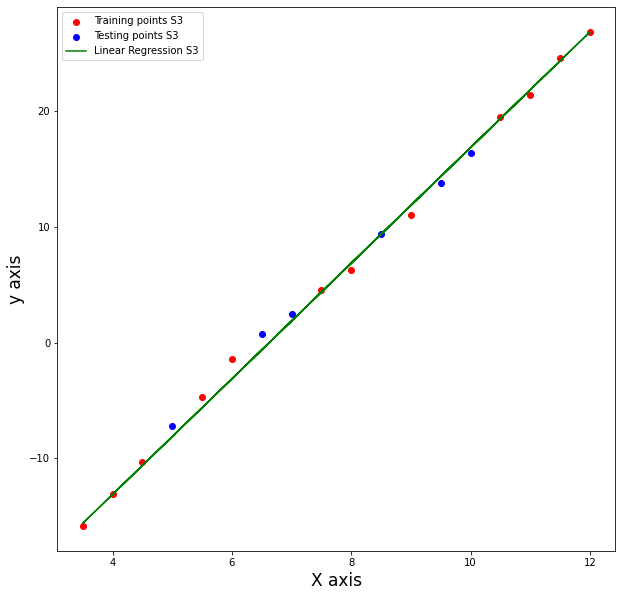

In [45]:
figure(figsize=(10,10))
plt.scatter(train[f_3]['X'], train[f_3]['y'], color = 'red', label = 'Training points S3')
plt.scatter(test[f_3_test]['X'], test[f_3_test]['y'], color = 'blue', label = 'Testing points S3')
plt.plot(train[f_3]['X'], gamma_1_left*train[f_3]['X'] + gamma_0_left, color = 'green', label = 'Linear Regression S3')

plt.xlabel('X axis', size = 17)
plt.ylabel('y axis', size = 17)

plt.legend()
plt.show()

$ \underline{Assembly \ \ of \ \ all \ \ points:} $

In [46]:
x_train_left = list(train['X'].sort_values())

In [47]:
y_pred_train_left = []

for x in x_train_left:
    if x <= v_1:
        y_pred_train_left.append(alpha_1_left*x + alpha_0_left)

    elif (x > v_1) and (x <= v_2):
        y_pred_train_left.append(beta_1_left*x + beta_0_left)
    
    else:
        y_pred_train_left.append(gamma_1_left*x + gamma_0_left)

Graph

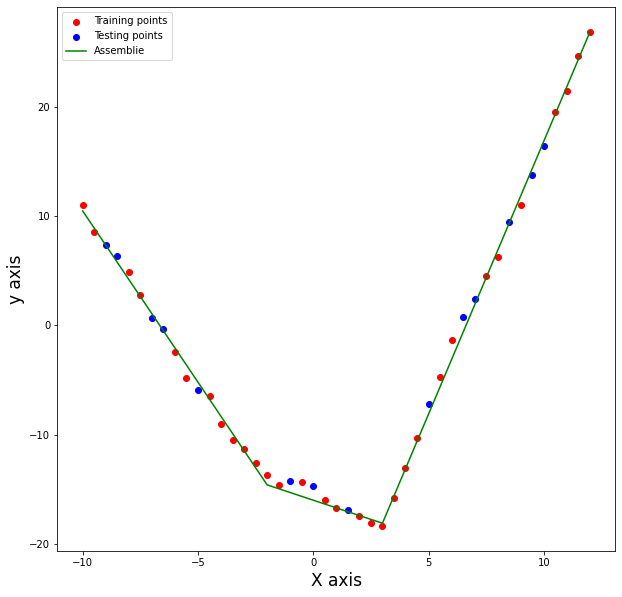

In [48]:
figure(figsize=(10,10))
plt.scatter(train['X'], train['y'], color = 'red', label = 'Training points')
plt.scatter(test['X'], test['y'], color = 'blue', label = 'Testing points')
plt.plot(x_train_left, y_pred_train_left, color = 'green', label = 'Assemblie')

plt.xlabel('X axis', size = 17)
plt.ylabel('y axis', size = 17)

plt.legend()
plt.show()

**Performance:**

i. Train:

In [49]:
train['y_p_left'] = f_1*(alpha_1_left*train['X'] + alpha_0_left) + f_2*(beta_1_left*train['X'] + beta_0_left) + f_3*(gamma_1_left*train['X'] + gamma_0_left)

In [50]:
sq_err_train_left = round(((train['y'] - train['y_p_left'])**2).sum()/len(train), 2)

In [51]:
abs_err_train_left = round(abs(train['y'] - train['y_p_left']).sum()/len(train), 2)

In [52]:
sq_err_train_left, abs_err_train_left

(0.38, 0.47)

ii. Test

In [53]:
test['y_p_left'] = f_1_test*(alpha_1_left*test['X'] + alpha_0_left) + f_2_test*(beta_1_left*test['X'] + beta_0_left) + f_3_test*(gamma_1_left*test['X'] + gamma_0_left)

In [54]:
sq_err_test_left = round(((test['y'] - test['y_p_left'])**2).sum()/len(test), 2)

In [55]:
abs_err_test_left = round(abs(test['y'] - test['y_p_left']).sum()/len(test), 2)

In [56]:
sq_err_test_left, abs_err_test_left

(0.53, 0.6)

### $ \underline{2. \ Right \ \ to \ \ the \ \ left:} $

**a. Third section**

Normalizing variables

In [57]:
X_3_norm = (X_3 - X_3.mean())/X_3.std()
y_3_norm = (y_3 - y_3.mean())/y_3.std()

In [58]:
reg_3_norm_right = LinearRegression().fit(X_3_norm, y_3_norm)

In [59]:
gamma_1_norm_right = reg_3_norm_right.coef_[0]
gamma_0_norm_right = reg_3_norm_right.intercept_

In [60]:
gamma_1_norm_right, gamma_0_norm_right

(0.999035335972579, -6.356301839377819e-17)

We have:

$ y_{3, norm} = \gamma_{1, norm}^{right} \cdot X_{3, norm} + \gamma_{0, norm}^{right} $ 

$ \Rightarrow $

$ \left( \cfrac{y_3 - \bar{y_3}}{\sigma({y_3})} \right) = \gamma_{1, norm}^{right} \cdot \left( \cfrac{X_3 - \bar{X_3}}{\sigma({X_3})} \right) + \gamma_{0, norm}^{right} $ 

$ \Rightarrow $

$ y_3 = \textcolor{red}{\left( \cfrac{\sigma(y_3)}{\sigma(X_3)} \cdot \gamma_{1, norm}^{right} \right)} \cdot X_3 + \textcolor{red}{ \left( \bar{y_3} + \sigma(y_3) \cdot \gamma_{0, norm}^{right} -  \cfrac{\sigma(y_3)}{\sigma(X_3)} \cdot \gamma_{1, norm}^{right} \cdot \bar{X_3} \right)}  $ 

$ \Rightarrow $

$ \boxed{\gamma^1_{right} = \textcolor{green}{\left( \cfrac{\sigma(y_3)}{\sigma(X_3)} \cdot \gamma_{1, norm}^{right} \right)}} \ \ \ (9) $ 

$ \boxed{\gamma^0_{right} =  \textcolor{green}{ \left( \bar{y_3} + \sigma(y_3) \cdot \gamma_{0, norm}^{right} -  \cfrac{\sigma(y_3)}{\sigma(X_3)} \cdot \gamma_{1, norm}^{right} \cdot \bar{X_3} \right)}} \ \ \ (10) $ 

In [61]:
gamma_1_right = (y_3.std()/X_3.std())*gamma_1_norm_right

In [62]:
gamma_0_right = y_3.mean() + y_3.std()*gamma_0_norm_right - (y_3.std()/X_3.std())*gamma_1_norm_right*X_3.mean()

In [63]:
gamma_1_right, gamma_0_right

(4.931116868716799, -32.46762037846602)

Graph

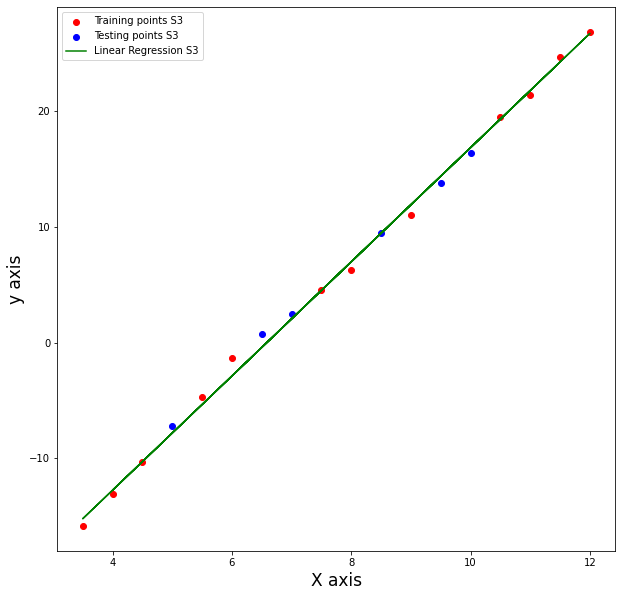

In [64]:
figure(figsize=(10,10))
plt.scatter(train[f_3]['X'], train[f_3]['y'], color = 'red', label = 'Training points S3')
plt.scatter(test[f_3_test]['X'], test[f_3_test]['y'], color = 'blue', label = 'Testing points S3')
plt.plot(train[f_3]['X'], gamma_1_right*train[f_3]['X'] + gamma_0_right, color = 'green', label = 'Linear Regression S3')

plt.xlabel('X axis', size = 17)
plt.ylabel('y axis', size = 17)

plt.legend()
plt.show()

**b. Second section**

In [65]:
u_2_right = train[f_2]['y'] - (gamma_1_right*v_2 + gamma_0_right)
W_2_right = train[f_2][['X']] - v_2

In [66]:
u_2_right_norm = u_2_right/u_2_right.std()
W_2_right_norm = W_2_right/W_2_right.std()

In [67]:
reg_2_norm_right = LinearRegression(fit_intercept=False).fit(W_2_right_norm, u_2_right_norm)

In [68]:
beta_1_norm_right = reg_2_norm_right.coef_[0]

In [69]:
beta_1_norm_right

-0.7296984051986537

We have:

$ u_{2, norm}^{right} = \beta_{1, norm}^{right} \cdot W_{2, norm}^{right} $ 

$ \cfrac{u_{2}^{right}}{\sigma(u_{2}^{right})} = \beta_{1, norm}^{right} \cdot \left( \cfrac{W_{2}^{right}}{\sigma(W_{2}^{right})} \right) $ 

$ \Rightarrow $

$ u_{2}^{right} = \textcolor{red}{\left( \beta_{1, norm}^{right} \cdot  \cfrac{\sigma(u_{2}^{right})}{\sigma(W_{2}^{right})} \right)} \cdot W_{2}^{right} $ 

$ \Rightarrow $

$ \boxed{\beta_1^{right} = \textcolor{green}{\left( \beta_{1, norm}^{right} \cdot  \cfrac{\sigma(u_{2}^{right})}{\sigma(W_{2}^{right})} \right)}} \ \ \ (11) $

In [70]:
beta_1_right = beta_1_norm_right*(u_2_right.std()/W_2_right.std()[0])

In [71]:
beta_1_right

-0.7244897592198815

Remembering

$ \boxed{\textcolor{red}{\beta_0^{right}} = \textcolor{green}{\gamma_1^{right}} \cdot \textcolor{green}{v_2} + \textcolor{green}{\gamma_0^{right}} -  \textcolor{red}{\beta_1^{right}} \cdot \textcolor{green}{v_2}} \ \ \ (3)  $

In [72]:
beta_0_right = gamma_1_right*v_2 + gamma_0_right - beta_1_right*v_2

In [73]:
beta_1_right, beta_0_right

(-0.7244897592198815, -15.50080049465598)

Graph

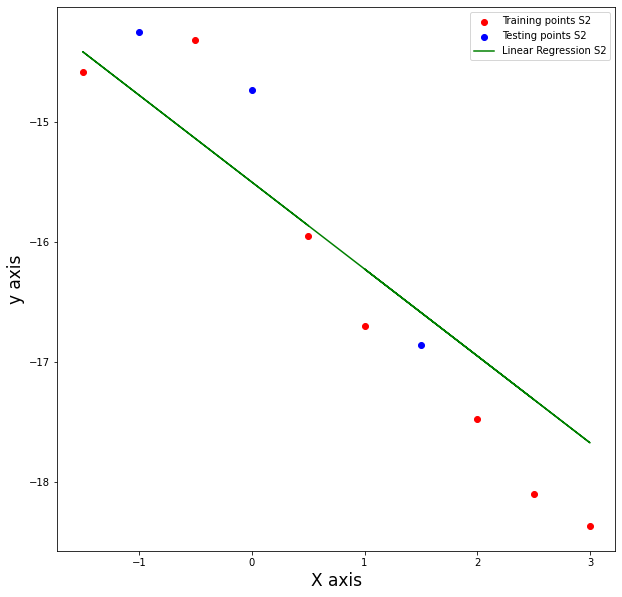

In [74]:
figure(figsize=(10,10))
plt.scatter(train[f_2]['X'], train[f_2]['y'], color = 'red', label = 'Training points S2')
plt.scatter(test[f_2_test]['X'], test[f_2_test]['y'], color = 'blue', label = 'Testing points S2')
plt.plot(train[f_2]['X'], beta_1_right*train[f_2]['X'] + beta_0_right, color = 'green', label = 'Linear Regression S2')

plt.xlabel('X axis', size = 17)
plt.ylabel('y axis', size = 17)

plt.legend()
plt.show()

**c. First section**

In [75]:
u_1_right = train[f_1]['y'] - (beta_1_right*v_1 + beta_0_right)
W_1_right = train[f_1][['X']] - v_1

In [76]:
u_1_right_norm = u_1_right/u_1_right.std()
W_1_right_norm = W_1_right/W_1_right.std()

In [77]:
reg_1_norm_right = LinearRegression(fit_intercept=False).fit(W_1_right_norm, u_1_right_norm)

In [78]:
alpha_1_norm_right = reg_1_norm_right.coef_[0]

In [79]:
alpha_1_norm_right

-0.9655790797695615

We have:

$ u_{1, norm}^{right} = \alpha_{1, norm}^{right} \cdot W_{1, norm}^{right} $ 

$ \cfrac{u_{1}^{right}}{\sigma(u_{1}^{right})} = \alpha_{1, norm}^{right} \cdot \left( \cfrac{W_{1}^{right}}{\sigma(W_{1}^{right})} \right) $ 

$ \Rightarrow $

$ u_{1}^{right} = \textcolor{red}{\left( \alpha_{1, norm}^{right} \cdot  \cfrac{\sigma(u_{1}^{right})}{\sigma(W_{1}^{right})} \right)} \cdot W_{1}^{right} $ 

$ \Rightarrow $

$ \boxed{\alpha_1^{right} = \textcolor{green}{\left( \alpha_{1, norm}^{right} \cdot  \cfrac{\sigma(u_{1}^{right})}{\sigma(W_{1}^{right})} \right)}} \ \ \ (12) $

In [80]:
alpha_1_right = alpha_1_norm_right*(u_1_right.std()/W_1_right.std()[0])

In [81]:
alpha_1_right

-3.0341574394645536

Remembering

$ \boxed{\textcolor{red}{\alpha_0^{right}} = \textcolor{green}{\beta_1^{right}} \cdot \textcolor{green}{v_1} + \textcolor{green}{\beta_0^{right}} -  \textcolor{red}{\alpha_1^{right}} \cdot \textcolor{green}{v_1}} \ \ \ (4)  $

In [82]:
alpha_0_right = beta_1_right*v_1 + beta_0_right - alpha_1_right*v_1

In [83]:
alpha_1_right, alpha_0_right

(-3.0341574394645536, -20.120135855145325)

Graph

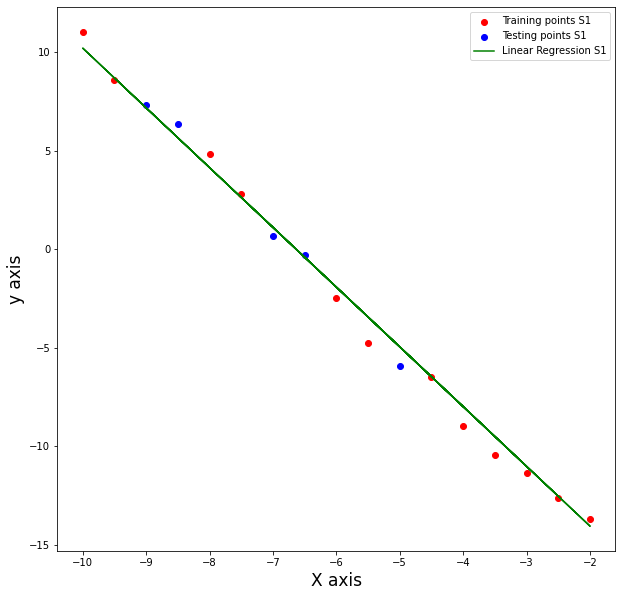

In [84]:
figure(figsize=(10,10))
plt.scatter(train[f_1]['X'], train[f_1]['y'], color = 'red', label = 'Training points S1')
plt.scatter(test[f_1_test]['X'], test[f_1_test]['y'], color = 'blue', label = 'Testing points S1')
plt.plot(train[f_1]['X'], alpha_1_right*train[f_1]['X'] + alpha_0_right, color = 'green', label = 'Linear Regression S1')

plt.xlabel('X axis', size = 17)
plt.ylabel('y axis', size = 17)

plt.legend()
plt.show()

$ \underline{Assembly \ \ of \ \ all \ \ points:} $

In [85]:
x_train_right = list(train['X'].sort_values())

In [86]:
y_pred_train_right = []

for x in x_train_right:
    if x <= v_1:
        y_pred_train_right.append(alpha_1_right*x + alpha_0_right)

    elif (x > v_1) and (x <= v_2):
        y_pred_train_right.append(beta_1_right*x + beta_0_right)
    
    else:
        y_pred_train_right.append(gamma_1_right*x + gamma_0_right)

Graph

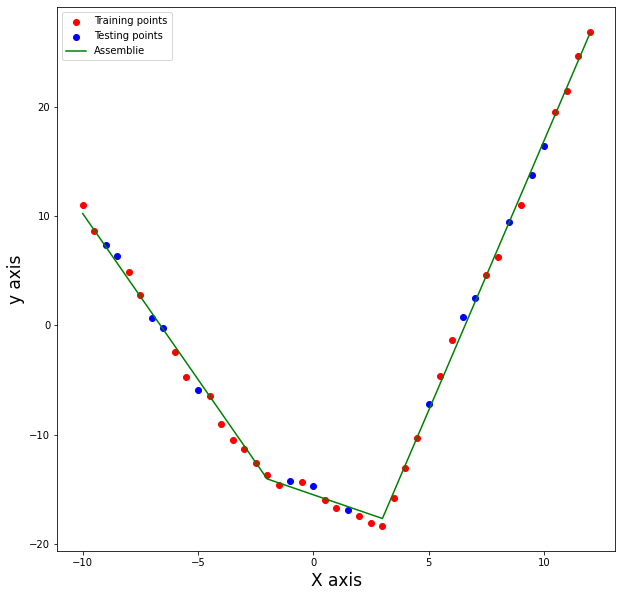

In [87]:
figure(figsize=(10,10))
plt.scatter(train['X'], train['y'], color = 'red', label = 'Training points')
plt.scatter(test['X'], test['y'], color = 'blue', label = 'Testing points')
plt.plot(x_train_right, y_pred_train_right, color = 'green', label = 'Assemblie')

plt.xlabel('X axis', size = 17)
plt.ylabel('y axis', size = 17)

plt.legend()
plt.show()

**Performance:**

i. Train:

In [88]:
train['y_p_right'] = f_1*(alpha_1_right*train['X'] + alpha_0_right) + f_2*(beta_1_right*train['X'] + beta_0_right) + f_3*(gamma_1_right*train['X'] + gamma_0_right)

In [89]:
sq_err_train_right = round(((train['y'] - train['y_p_right'])**2).sum()/len(train), 2)

In [90]:
abs_err_train_right = round(abs(train['y'] - train['y_p_right']).sum()/len(train), 2)

In [91]:
sq_err_train_right, abs_err_train_right

(0.41, 0.51)

ii. Test

In [92]:
test['y_p_right'] = f_1_test*(alpha_1_right*test['X'] + alpha_0_right) + f_2_test*(beta_1_right*test['X'] + beta_0_right) + f_3_test*(gamma_1_right*test['X'] + gamma_0_right)

In [93]:
sq_err_test_right = round(((test['y'] - test['y_p_right'])**2).sum()/len(test), 2)

In [94]:
abs_err_test_right = round(abs(test['y'] - test['y_p_right']).sum()/len(test), 2)

In [95]:
sq_err_test_right, abs_err_test_right

(0.36, 0.51)

### Comparison of the two assemblies

**Performance**

i. Train:

In [96]:
sq_err_train_left, sq_err_train_right

(0.38, 0.41)

In [97]:
abs_err_train_left, abs_err_train_right

(0.47, 0.51)

ii. Test:

In [98]:
sq_err_test_left, sq_err_test_right

(0.53, 0.36)

In [99]:
abs_err_test_left, abs_err_test_right

(0.6, 0.51)

**Comments:** As you can see both assemblies have similar error both in training and test set (considering two metrics). In the training, the assemblie from the left to the right has the best performance and in the testing the assemblie from the right to the left has the best performance. 

**Graphic comparision**

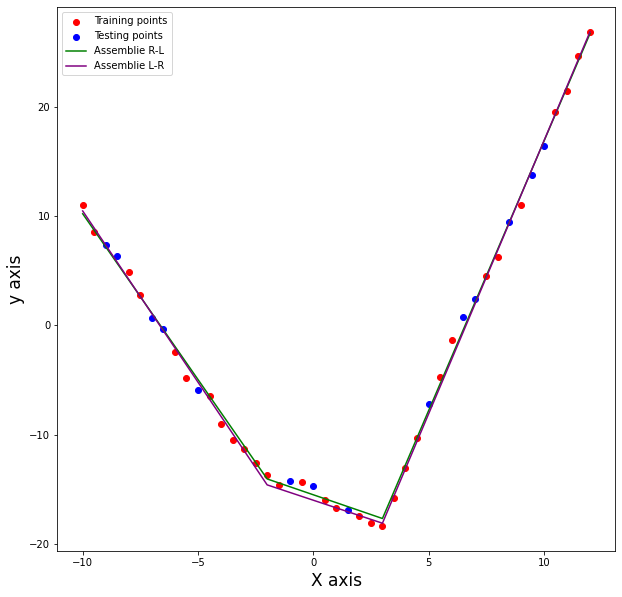

In [100]:
figure(figsize=(10,10))
plt.scatter(train['X'], train['y'], color = 'red', label = 'Training points')
plt.scatter(test['X'], test['y'], color = 'blue', label = 'Testing points')
plt.plot(x_train_right, y_pred_train_right, color = 'green', label = 'Assemblie R-L')
plt.plot(x_train_left, y_pred_train_left, color = 'purple', label = 'Assemblie L-R')

plt.xlabel('X axis', size = 17)
plt.ylabel('y axis', size = 17)

plt.legend()
plt.show()

### Functions associated to the two assemblies

In [101]:
def assemblie_L_to_R(x):

    if x <= v_1:
        return alpha_1_left*x + alpha_0_left
    
    elif (x > v_1) and (x <= v_2):
        return beta_1_left*x + beta_0_left
    
    else:
        return gamma_1_left*x + gamma_0_left

In [102]:
def assemblie_R_to_L(x):

    if x <= v_1:
        return alpha_1_right*x + alpha_0_right
    
    elif (x > v_1) and (x <= v_2):
        return beta_1_right*x + beta_0_right
    
    else:
        return gamma_1_right*x + gamma_0_right

### Creation of columns with the predictions of the two models

In [103]:
df["y_pred_LR"] = df["X"].map(lambda x: assemblie_L_to_R(x))
df["y_pred_RL"] = df["X"].map(lambda x: assemblie_R_to_L(x))

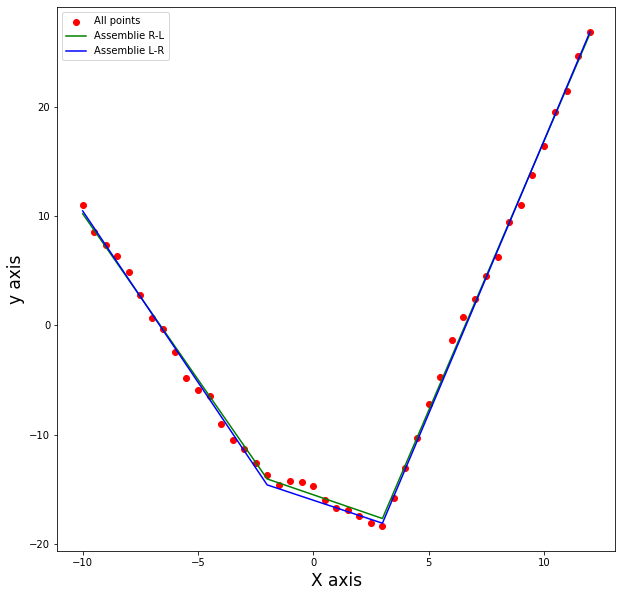

In [104]:
figure(figsize=(10,10))
plt.scatter(df['X'], df['y'], color = 'red', label = 'All points')
plt.plot(df['X'], df['y_pred_RL'], color = 'green', label = 'Assemblie R-L')
plt.plot(df['X'], df['y_pred_LR'], color = 'blue', label = 'Assemblie L-R')

plt.xlabel('X axis', size = 17)
plt.ylabel('y axis', size = 17)

plt.legend()
plt.show()